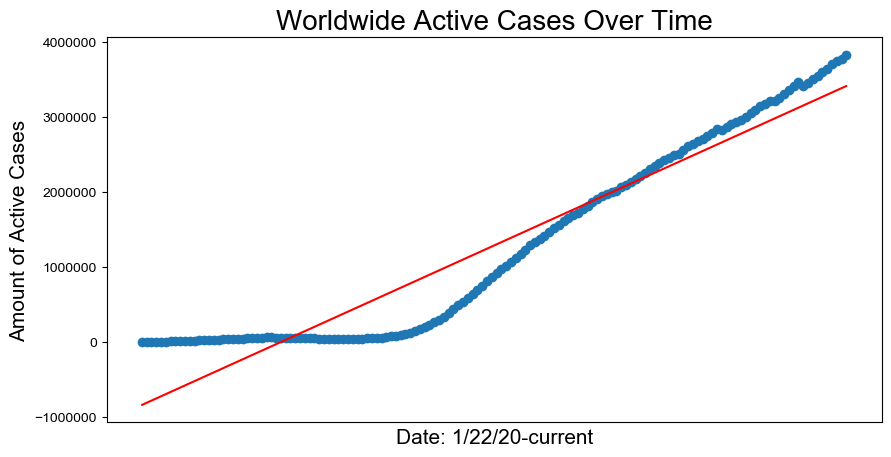

In [27]:
#import mipasa
import dateutil
from datetime import datetime as dt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.dates as mdates
import time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


confirm = pd.read_csv('Output_JHU_Confirmed.csv')
deaths = pd.read_csv('Output_JHU_Deaths.csv')
recov = pd.read_csv('Output_JHU_Recovered.csv')

worldwide_cases = confirm.groupby('date')['cases'].sum().reset_index()
worldwide_deaths = deaths.groupby('date')['cases'].sum().reset_index()
worldwide_recov = recov.groupby('date')['cases'].sum().reset_index()
worldwide_cases.head()
worldwide_sum = pd.DataFrame()
worldwide_sum['active'] = worldwide_cases['cases'] - worldwide_deaths['cases'] - worldwide_recov['cases']
worldwide_sum['date'] = pd.to_datetime(worldwide_cases['date'])
worldwide_sum['date']=worldwide_sum['date'].map(dt.toordinal)

X = worldwide_sum.date.to_numpy().reshape(-1,1)
Y = worldwide_sum.active.to_numpy().reshape(-1,1)
#print("x ",X)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")

plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
sns.set_style("whitegrid")
plt.title('Worldwide Active Cases Over Time',fontsize=20)
plt.ylabel("Amount of Active Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-current",fontsize=15)
plt.tick_params(labelbottom=False, bottom=False)
#plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()